### [kdegrave.github.io](https://kdegrave.github.io/)

### Introduction

The Federal National Mortgage Association (FNMA), also known as Fannie Mae, is a government-sponsored corporation founded in 1938. Fannie Mae purchases mortgage loans from primary lenders like Bank of America and Wells Fargo, among several others. After these mortgages are acquired, Fannie Mae sells them as securities in the bond market. These sales "provide lenders with the liquidity to fund more mortgages, and until 2006, the mortgage-backed securities (MBS) sold by Fannie Mae were considered solid investments." Unfortunately, however, not all borrowers whose loans have been purchased by Fannie Mae are able to repay their mortgages in a timely manner, and many end up defaulting at some point. In fact, between 2006 and 2008, many thousands of people had defaulted, causing these securities to decreases significantly in value, thereby strongly impacting the global economy.

Fannie Mae has made its Single Family Loan Performance (SFLP) data available to anyone interested in examining at it. As of this writing, the SFLP data are available for every year, starting from 1999. The goal of this work is to develop a predictive model to identify borrowers at risk of defaulting on their mortgage. Since the amount of data available to us is very large, we'll limit our analysis to only loans originating during the fourth quarter of 2007. Data from this time range contain an unusually large proportion of mortgages that eventually went into default, allowing us to more quickly build up a sizeable training set.

The data file is approximately 6GB in size and does not contain column headers. However, Fannie Mae also provides a glossary describing the data layout with definitions and data types for each of the fields. Let's read this file and display the first few rows.

In [885]:
import pandas as pd

pd.set_option('display.max_columns', 500)

In [886]:
glossary = pd.read_excel('/Users/kyledegrave/Downloads/crt-file-layout-and-glossary.xlsx', sheet_name='Combined Glossary')

In [887]:
glossary.head()

,Field Position,Field Name,Description,Date Bound Notes,Respective Disclosure Notes,CAS,CIRT,Single-Family (SF) Loan Performance,Type,Max Length
0,1,Reference Pool ID,A unique identifier for the reference pool.,NaN,NaN,√,√,NaN,ALPHA-NUMERIC,X(4)
1,2,Loan Identifier,A unique identifier for the mortgage loan.,NaN,The Loan Identifier does not correspond to oth...,√,√,√,ALPHA-NUMERIC,X(12)
2,3,Monthly Reporting Period,The month and year that pertains to the servic...,SF Loan Performance: Enhanced format with the ...,NaN,√,√,√,DATE,MMYYYY
3,4,Channel,The origination channel used by the party that...,NaN,Retail = R; Correspondent = C; Broker = B,√,√,√,ALPHA-NUMERIC,X(1)
4,5,Seller Name,The name of the entity that delivered the mort...,NaN,CAS/CIRT: For sellers whose combined loans' co...,√,√,√,ALPHA-NUMERIC,X(50)


There are 108 fields in the Field Name column, with their position in the dataset indictated by the Field Position. We can combine the Field Name and Type columns as a dictionary, and this dictionary will ensure that the appropriate data types are preserved when reading the SFLP dataset. 

In [735]:
dtype = dict(
    zip(
        glossary['Field Name'].tolist(),
        glossary['Type'].replace({'NUMERIC': 'float', 'NUMERIC ': 'float', 'ALPHA-NUMERIC': 'object', 'DATE': 'object'})
    )
)

A sample of the SFLP data can now be read in and displayed.

In [888]:
pd.read_csv('/Users/kyledegrave/Downloads/2007Q4.csv', sep='|', nrows=5, names=glossary['Field Name'], dtype=dtype)

,Reference Pool ID,Loan Identifier,Monthly Reporting Period,Channel,Seller Name,Servicer Name,Master Servicer,Original Interest Rate,Current Interest Rate,Original UPB,UPB at Issuance,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Loan Age,Remaining Months to Legal Maturity,Remaining Months To Maturity,Maturity Date,Original Loan to Value Ratio (LTV),Original Combined Loan to Value Ratio (CLTV),Number of Borrowers,Debt-To-Income (DTI),Borrower Credit Score at Origination,Co-Borrower Credit Score at Origination,First Time Home Buyer Indicator,Loan Purpose,Property Type,Number of Units,Occupancy Status,Property State,Metropolitan Statistical Area (MSA),Zip Code Short,Mortgage Insurance Percentage,Amortization Type,Prepayment Penalty Indicator,Interest Only Loan Indicator,Interest Only First Principal And Interest Payment Date,Months to Amortization,Current Loan Delinquency Status,Loan Payment History,Modification Flag,Mortgage Insurance Cancellation Indicator,Zero Balance Code,Zero Balance Effective Date,UPB at the Time of Removal,Repurchase Date,Scheduled Principal Current,Total Principal Current,Unscheduled Principal Current,Last Paid Installment Date,Foreclosure Date,Disposition Date,Foreclosure Costs,Property Preservation and Repair Costs,Asset Recovery Costs,Miscellaneous Holding Expenses and Credits,Associated Taxes for Holding Property,Net Sales Proceeds,Credit Enhancement Proceeds,Repurchase Make Whole Proceeds,Other Foreclosure Proceeds,Modification-Related Non-Interest Bearing UPB,Principal Forgiveness Amount,Original List Start Date,Original List Price,Current List Start Date,Current List Price,Borrower Credit Score At Issuance,Co-Borrower Credit Score At Issuance,Borrower Credit Score Current,Co-Borrower Credit Score Current,Mortgage Insurance Type,Servicing Activity Indicator,Current Period Modification Loss Amount,Cumulative Modification Loss Amount,Current Period Credit Event Net Gain or Loss,Cumulative Credit Event Net Gain or Loss,Special Eligibility Program,Foreclosure Principal Write-off Amount,Relocation Mortgage Indicator,Zero Balance Code Change Date,Loan Holdback Indicator,Loan Holdback Effective Date,Delinquent Accrued Interest,Property Valuation Method,High Balance Loan Indicator,ARM Initial Fixed-Rate Period ≤ 5 YR Indicator,ARM Product Type,Initial Fixed-Rate Period,Interest Rate Adjustment Frequency,Next Interest Rate Adjustment Date,Next Payment Change Date,Index,ARM Cap Structure,Initial Interest Rate Cap Up Percent,Periodic Interest Rate Cap Up Percent,Lifetime Interest Rate Cap Up Percent,Mortgage Margin,ARM Balloon Indicator,ARM Plan Number,Borrower Assistance Plan,High Loan to Value (HLTV) Refinance Option Indicator,Deal Name,Repurchase Make Whole Proceeds Flag,Alternative Delinquency Resolution,Alternative Delinquency Resolution Count,Total Deferral Amount
0,NaN,100002296854,112007,C,"Bank Of America, N.A.","Bank Of America, N.A.",NaN,6.625,6.625,343000.0,NaN,0.0,360.0,102007,122007,0.0,360.0,359.0,112037,86.0,86.0,2.0,27.0,751.0,756.0,N,C,PU,1.0,P,CO,17820,809,25.0,FRM,N,NaN,NaN,NaN,00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,N,NaN,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
1,NaN,100002296854,122007,C,"Bank Of America, N.A.","Bank Of America, N.A.",NaN,6.625,6.625,343000.0,NaN,0.0,360.0,102007,122007,1.0,359.0,358.0,112037,86.0,86.0,2.0,27.0,751.0,756.0,N,C,PU,1.0,P,CO,17820,809,25.0,FRM,N,NaN,NaN,NaN,00,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,N,NaN,NaN,NaN,NaN,7,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
2,NaN,100002296854,012008,C,"Bank Of America, N.A.","Bank Of America, N.A.",NaN,6.625,6.625,343000.0,NaN,0.0,360.0,102007,122007,2.0,358.0,357.0,11

The data contain a loan identification number along with information regarding the loan servicer, interest rate, loan term, loan age, etc. The full dataset is large, but we can read and process it in chunks so that we don't have to hold the entire thing in memory.

The first few lines of code below ensure that the loan origination dates actually fall within the fourth quarter of 2007. Even though this *should* be true by default, a small percentage of loans fall outside of this range. Mortgage defaults are then identified based on the presence of a non-null value in the Foreclosure Date column. For each default, we get the data row corresponding to the earliest Loan Age value. Our goal here is to ensure the model only learns from data that would have been available at or near the time of origination. Non-default loans are simply those that do not fall into the default group.

In [863]:
for data in pd.read_csv('/Users/kyledegrave/Downloads/2007Q4.csv', sep='|', names=glossary['Field Name'], dtype=dtype, chunksize=100000):

    data['Origination datate'] = pd.to_datatetime(data['Origination datate'], format='%m%Y')
    data['Foreclosure datate'] = pd.to_datatetime(data['Foreclosure datate'], format='%m%Y')

    data = data[
        (data['Origination datate'] >= '2007-10-01') &
        (data['Origination datate'] <= '2007-12-31')
    ].sort_values(['Loan Identifier', 'Loan Age'])

    # Default loans
    identifier = data[data['Foreclosure datate'] <= data['Origination datate'] + pd.datateOffset(months=72)][['Loan Identifier']].drop_duplicates()

    default = data.merge(identifier, on='Loan Identifier', how='inner')

    default = default[default['Loan Age'].isin([0, 1])].drop_duplicates('Loan Identifier', keep='first').reset_index(drop=True)

    # Non-default loans
    non_default = data.merge(identifier, on='Loan Identifier', how='left', indicator=True)

    non_default = non_default[
        (non_default['_merge'] == 'left_only') &
        (non_default['Loan Age'].isin([0, 1]))
    ].drop('_merge', axis=1).drop_duplicates('Loan Identifier', keep='first').reset_index(drop=True)

    default.to_csv('/Users/kyledegrave/Desktop/default.csv', mode='a', index=False, header=not os.path.exists('/Users/kyledegrave/Desktop/default.csv'))

    non_default.to_csv('/Users/kyledegrave/Desktop/non_default.csv', mode='a', index=False, header=not os.path.exists('/Users/kyledegrave/Desktop/non_default.csv'))

    gc.collect()

### Data Exploration

Now that the data has been prepped, we can read it in and do some exploration. We'll give the default loans a target value of 1 and the non-default loans a value of 0 for modeling purposes later on. The non-default loans will be undersampled to create a balanced dataset.

In [896]:
default_loans = pd.read_csv('/Users/kyledegrave/Desktop/default.csv')

non_default_loans = pd.read_csv('/Users/kyledegrave/Desktop/non_default.csv')

In [897]:
default_loans['Target'] = 1

non_default_loans['Target'] = 0

In [989]:
df = pd.concat([default_loans, non_default_loans.sample(n=len(default_loans), random_state=0)], axis=0).reset_index(drop=True)

df.columns = [i.strip() for i in df.columns]

In [990]:
print(f"""
    Number rows: {df.shape[0]}
    Number columns: {df.shape[1]}
    Number null columns: {((df.isnull().sum()/len(df)) == 1).sum()}
""")


    Number rows: 33256
    Number columns: 109
    Number null columns: 66



There are over 33k records in the data, and 66 columns are completely null. We can remove these from the dataset.

In [991]:
df.dropna(axis=1, how='all', inplace=True)

There are also several more columns that we can remove. Some of these columns contain values that are meaningless or would not be available at the time of loan origination (e.g., Current Loan Delinquency Status), while others contain only a single value (e.g., High Balance Loan Indicator).

In [994]:
columns_to_remove = [
    'Loan Identifier',
    'Monthly Reporting Period',
    'Seller Name',
    'Current Interest Rate',
    'Current Actual UPB',
    'Origination Date',
    'First Payment Date',
    'Loan Age',
    'Remaining Months to Legal Maturity',
    'Maturity Date',
    'Amortization Type',
    'Prepayment Penalty Indicator',
    'Current Loan Delinquency Status',
    'Modification Flag',
    'Servicing Activity Indicator',
    'Special Eligibility Program',
    'Relocation Mortgage Indicator',
    'High Balance Loan Indicator',
    'High Loan to Value (HLTV) Refinance Option Indicator'
]

In [995]:
df.drop(columns_to_remove, axis=1, inplace=True)

Let's check the proportion of null values in the remaining columns.

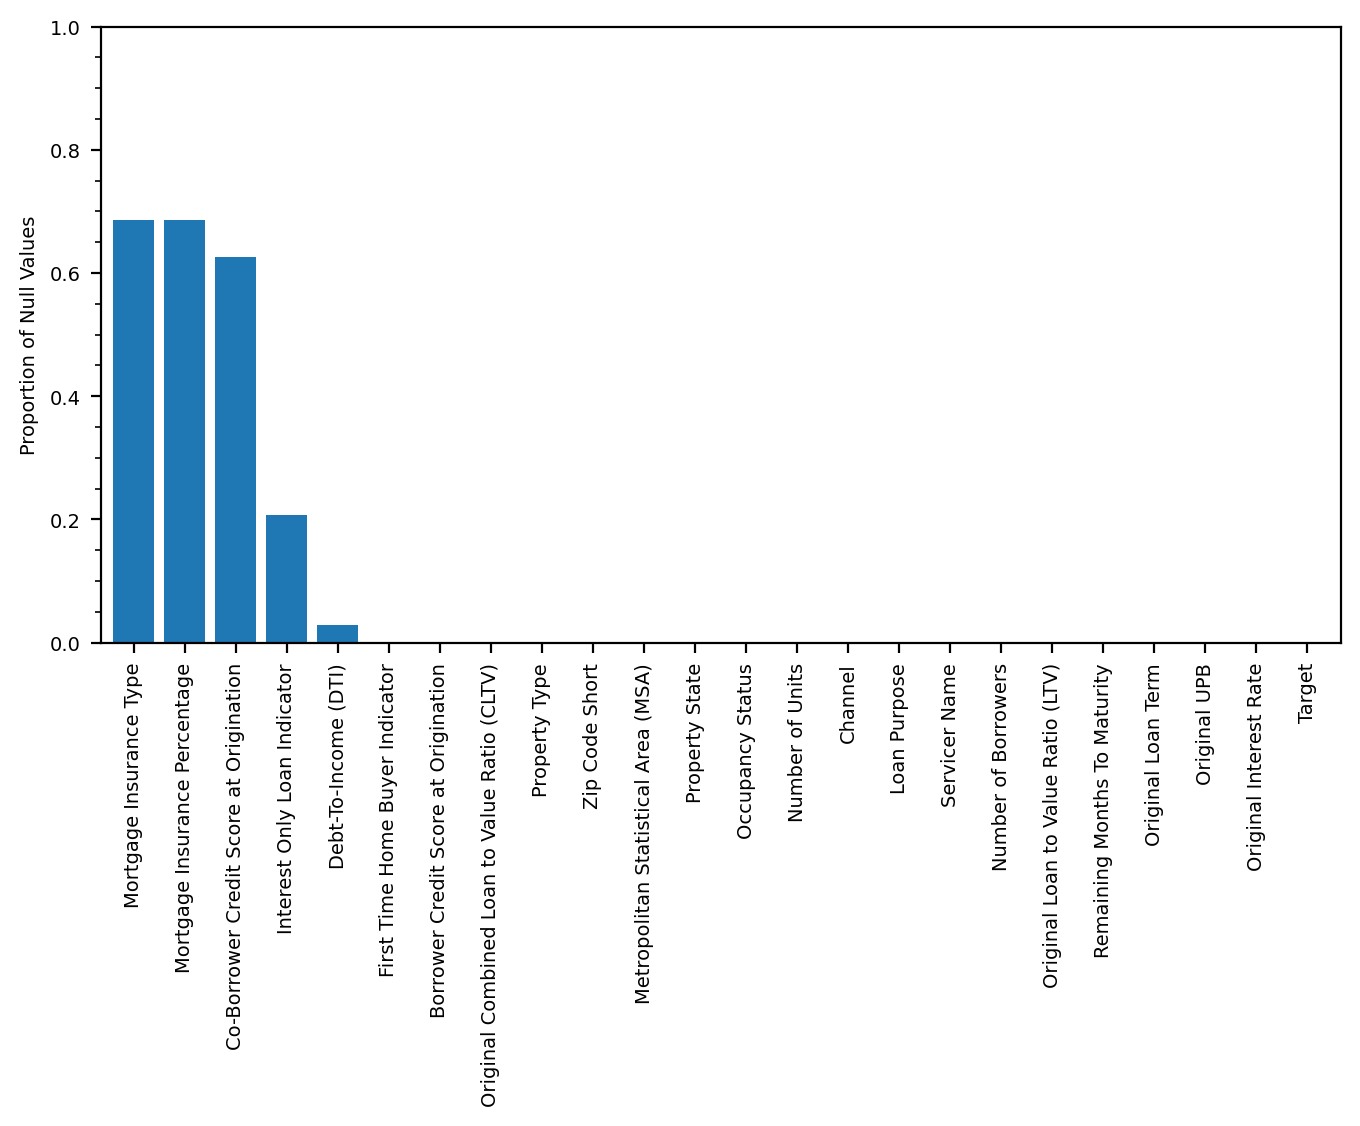

In [996]:
ax = df.isnull().sum().divide(len(df)).sort_values(ascending=False).plot.bar(width=0.8, figsize=(8, 4), fontsize=7)

ax.set_ylim(0, 1)

ax.minorticks_on()
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.yaxis.set_tick_params(which='minor', bottom=True)

ax.set_ylabel('Proportion of Null Values', fontsize=7);

We can explore the data for any interesting trends and to get a sense for which columns might be useful in identifying defaulters.

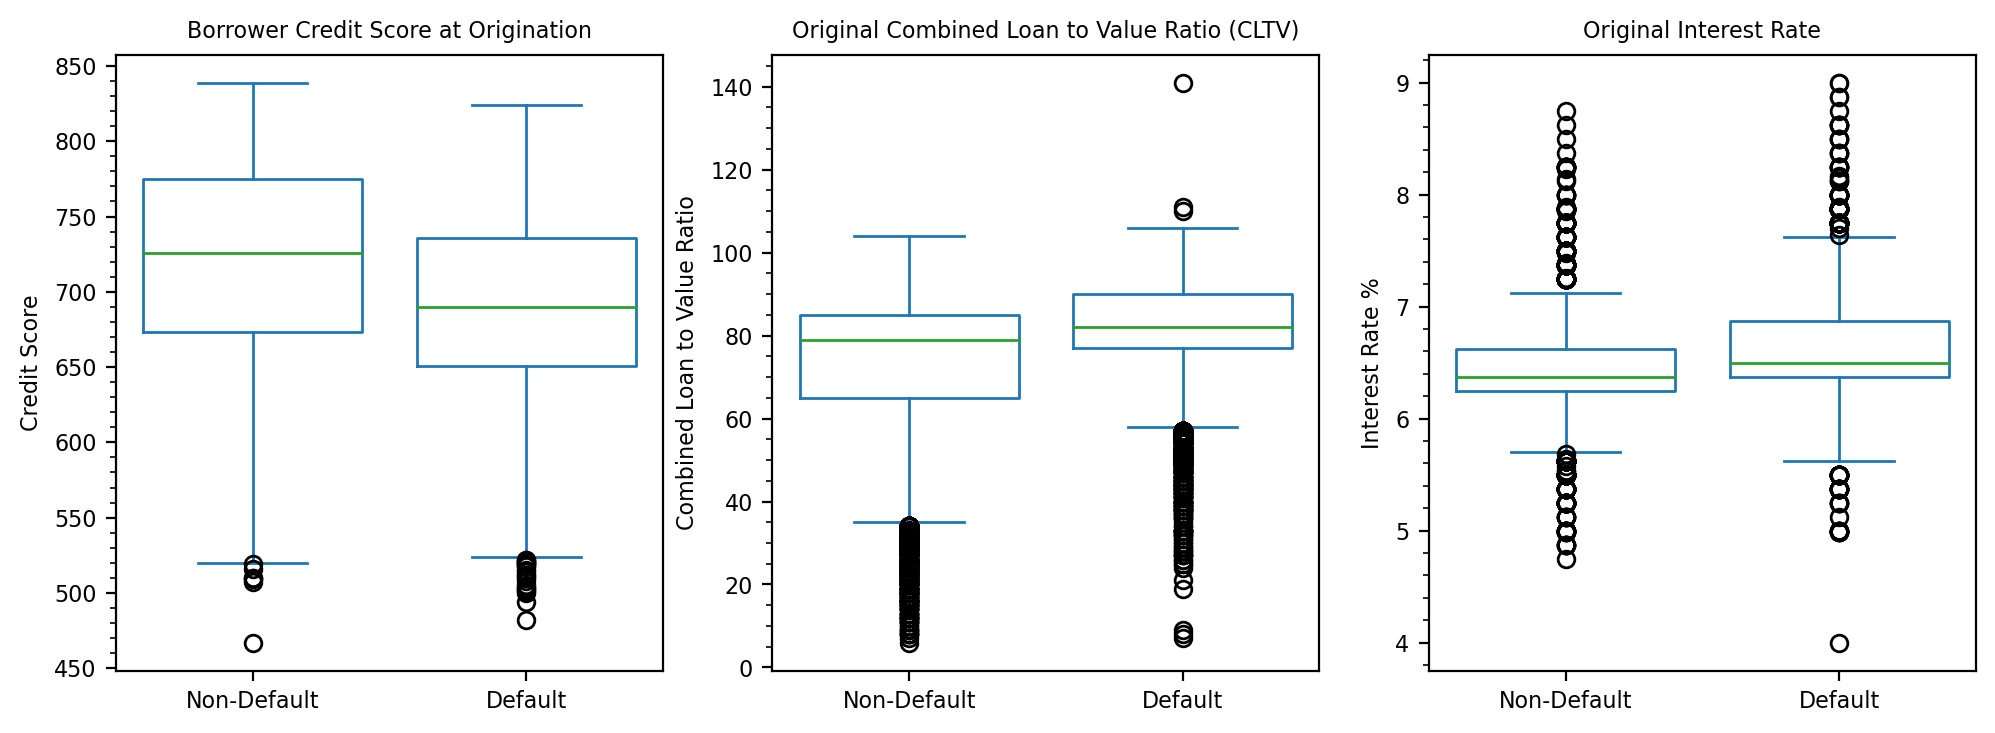

In [1130]:
fig, axs = subplots(nrows=1, ncols=3, figsize=(12, 4))

df.plot.box(column='Borrower Credit Score at Origination', by='Target', widths=0.8, ax=axs[0], fontsize=8)

df.plot.box(column='Original Combined Loan to Value Ratio (CLTV)', by='Target', widths=0.8, ax=axs[1], fontsize=8)

df.plot.box(column='Original Interest Rate', by='Target', widths=0.8, ax=axs[2], fontsize=8)

axs[0].set_title('Borrower Credit Score at Origination', fontsize=8)
axs[0].set_ylabel('Credit Score', fontsize=8)
axs[0].set_xticklabels(['Non-Default', 'Default'], fontsize=8)

axs[1].set_title('Original Combined Loan to Value Ratio (CLTV)', fontsize=8)
axs[1].set_ylabel('Combined Loan to Value Ratio', fontsize=8)
axs[1].set_xticklabels(['Non-Default', 'Default'], fontsize=8)

axs[2].set_title('Original Interest Rate', fontsize=8)
axs[2].set_ylabel('Interest Rate %', fontsize=8)
axs[2].set_xticklabels(['Non-Default', 'Default'], fontsize=8)

for i, j in enumerate(axs):
    axs[i].minorticks_on()
    axs[i].xaxis.set_tick_params(which='minor', bottom=False)
    axs[i].yaxis.set_tick_params(which='minor', bottom=True)

We can see that, on average, default borrowers have lower credit scores, higher loan-to-value ratios, and higher interest rates.

### Feature Engineering

We can use the existing data to engineer some new features that might give the model some extra predictive power. The dataset contains a three-digit ZIP code (zip3) component that might be useful. ZIP codes are categorical features whose digits give increasingly more granular geospatial information when more values are included. For example, the first digit of a ZIP code indicates a very broad geographic area covering several states, like the midwest or southeast regions of the United States. On the other hand, a full five-digit ZIP code often reaches the sub-county level within a state.

There are nearly a thousand different zip3 values in the dataset, and using all of them as categorical features may prove intractable. Using the first (or first two) digits instead might be more manageable, but there's another option. We can find the latitude and longitude centroids for each zip3 and feed them to the model as numeric features. This preserves the original zip3 granularity without the need for encoding so many categorical features.

To do this, we first read in a file that maps five-digit ZIP code to their latitude and longitude coordinates.

In [1003]:
df['Zip Code Short'] = df['Zip Code Short'].astype(str).str.zfill(3)

In [1177]:
ds = pd.read_csv('/Users/kyledegrave/Downloads/US/US.txt', sep='\t', header=None, 
                 usecols=[1, 9, 10], names=['Zip Code', 'Latitude', 'Longitude'], dtype={'Zip Code': str})

In [1178]:
ds.head()

,Zip Code,Latitude,Longitude
0,99553,54.1430,-165.7854
1,99571,55.1858,-162.7211
2,99583,54.8542,-163.4113
3,99612,55.0628,-162.3056
4,99661,55.3192,-160.4914


From this point, the first three digits are stripped, grouped, and the average of the latitude and longitude are taken.

In [1008]:
ds['Zip Code Short'] = ds['Zip Code'].apply(lambda x: x[:3])

ds = ds.groupby('Zip Code Short')[['Latitude', 'Longitude']].mean().reset_index()

In [1009]:
df = df.merge(ds, on='Zip Code Short')

We can now drop the Zip Code Short column as well as Property State and Metropolitan Statistical Area (MSA) since these are essentially all encoded within the latitude longitude coordinates.

In [1015]:
df.drop(['Zip Code Short', 'Property State', 'Metropolitan Statistical Area (MSA)'], axis=1, inplace=True)

Let's split the data into training and test sets and build our model.

In [1018]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.2, random_state=0)

### Model Training

The model we are going to build is a gradient-boosted decision tree classifier. A gradient-boosted model is one in which a series of weak learners are combined to produce a stronger ensemble model. This will be incorporated as part of a scikit-learn pipeline. A pipeline allows us to easily chain several processing steps (e.g., one-hot encoding, scaling of features, etc.) together into one seamless workflow. Let's import the necessary libraries and set up the pipeline.

In [1059]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib.pyplot import *
import numpy as np

from hyperopt import space_eval, Trials, STATUS_OK
from hyperopt import fmin, hp, tpe
from hyperopt.pyll import scope

We can process the categorical and numerical features separately. They are quickly identified by examining column data types.

In [1084]:
categorical_columns = x_tr.select_dtypes('object').columns.tolist()

numerical_columns = x_tr.select_dtypes('number').columns.tolist()

Missing values in the numerical data are filled with a constant value of -1 to simply convey to the model that they were not populated. Another common strategy for imputation includes filling missing values with the column mean or median. The categorical features will be imputed in a similar way, and will also be one-hot encoded.

In [1077]:
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=-1, add_indicator=False))
    ]
)

In [1078]:
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing_value', add_indicator=False)),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)

In [1079]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_columns),
        ('categorical', categorical_transformer, categorical_columns)
    ]
)

The gradient-boosted model has several hyperparameters which can be tuned to optimize performance. There are several ways to do this, but we will employ the Hyperopt library for optimization. Unlike a brute-force grid search, which can be time consuming and resouce intensive, Hyperopt attempts to find a suitable set of hyperparameters using Bayesian optimization techniques without having to test every combination directly. Cross-validation is used here to evaluate performance and to ensure the model is not overfitting.

In [1158]:
search_space = {
    'max_iter':          scope.int(hp.quniform('max_iter', 10, 350, q=1)),
    'learning_rate':     10**hp.uniform('learning_rate', -2, 0),
    'max_depth':         scope.int(hp.quniform('max_depth', 1, 20, q=1)),
    'max_leaf_nodes':    scope.int(hp.quniform('max_leaf_nodes', 3, 100, q=1)),
    'min_samples_leaf':  scope.int(hp.quniform('min_samples_leaf', 1, 100, q=1)),
    'l2_regularization': 10**hp.uniform('l2_regularization', -3, 3),
    'max_bins':          scope.int(hp.quniform('max_bins', 10, 255, q=1))
}

trials = Trials()

def objective(params):

    pipeline = Pipeline(
        steps = [
            ('preprocessor', preprocessor),
            ('classifier', HistGradientBoostingClassifier(**params, loss='log_loss', early_stopping='auto',
                                                          validation_fraction=0.2, random_state=0))
        ]
    )

    scores = cross_val_score(pipeline, x_tr, y_tr, cv=10, scoring='roc_auc', n_jobs=5)

    return {'loss': -scores.mean(), 'std': scores.std(), 'model': pipeline, 'status': STATUS_OK}

best_trial = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=25, trials=trials)

100%|████████| 25/25 [01:18<00:00,  3.16s/trial, best loss: -0.8308628608913831]


In [1159]:
best_params = space_eval(search_space, best_trial)

In [1160]:
print(best_params)

{'l2_regularization': 15.31016698614579, 'learning_rate': 0.12453778901558687, 'max_bins': 255, 'max_depth': 7, 'max_iter': 253, 'max_leaf_nodes': 72, 'min_samples_leaf': 63}


In [1161]:
best_model = trials.best_trial['result']['model']

best_model.fit(x_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=-1,
                                                                                 strategy='constant'))]),
                                                  ['Original Interest Rate',
                                                   'Original UPB',
                                                   'Original Loan Term',
                                                   'Remaining Months To '
                                                   'Maturity',
                                                   'Original Loan to Value '
                                                   'Ratio (LTV)',
                                                   'Original Combined Loan to '
                                                   'Value Ratio (CLTV)',
                                                   'Number of Borrowers',
                                                   'Debt-To-I...
                                                   'Loan Purpose',
                                                   'Property Type',
                                                   'Occupancy Status',
                                                   'Interest Only Loan '
                                                   'Indicator'])])),
                ('classifier',
                 HistGradientBoostingClassifier(class_weight={0: 0.3333333333333333,
                                                              1: 0.6666666666666666},
                                                l2_regularization=15.31016698614579,
                                                learning_rate=0.12453778901558687,
                                                max_depth=7, max_iter=253,
                                                max_leaf_nodes=72,
                                                min_samples_leaf=63,
                                                random_state=0,
                                                validation_fraction=0.2))])

### Model Evaluation

The trained model can now be evaluated by applying it to the unseen test data.

In [1162]:
predict_proba = best_model.predict_proba(x_te)[:, 1]

In [1163]:
fp, tp, threshold = roc_curve(y_te, predict_proba)

In [1164]:
score = roc_auc_score(y_te, predict_proba)

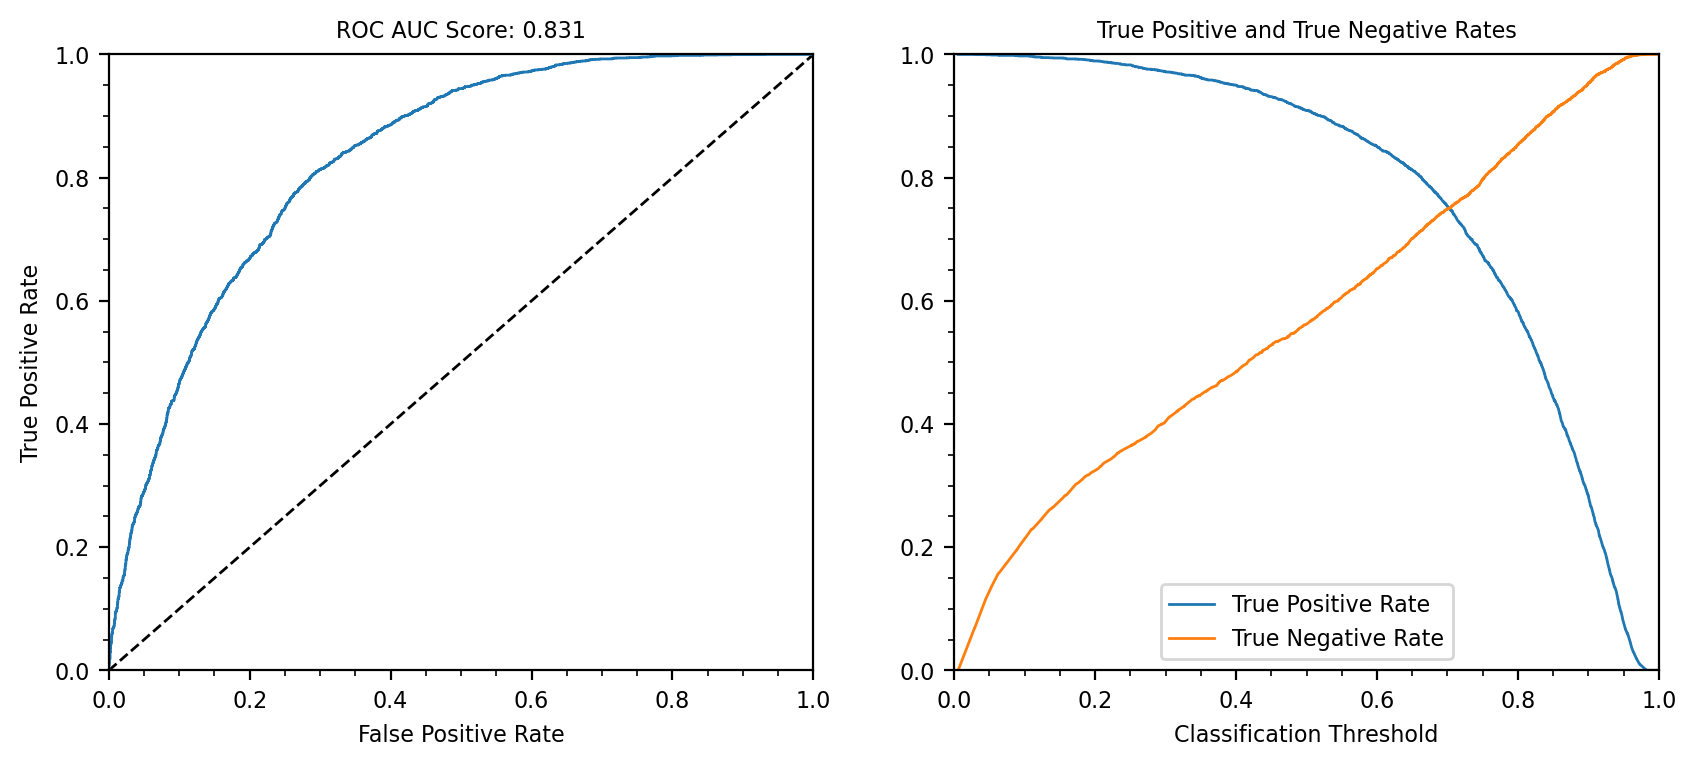

In [1165]:
fig, axs = subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot([0, 1], [0, 1], lw=1, ls='--', c='k')

axs[0].plot(fp, tp, lw=1)
axs[0].set_ylim(0, 1)
axs[0].set_xlim(0, 1)
axs[0].set_ylabel('True Positive Rate', fontsize=8)
axs[0].set_xlabel('False Positive Rate', fontsize=8)
axs[0].set_title(f'ROC AUC Score: {score.round(3)}', fontsize=8)

axs[1].plot(threshold, tp, lw=1)
axs[1].plot(threshold, 1 - fp, lw=1)
axs[1].set_ylim(0, 1)
axs[1].set_xlim(0, 1)
axs[1].set_xlabel('Classification Threshold', fontsize=8)
axs[1].set_title('True Positive and True Negative Rates', fontsize=8)
axs[1].legend(['True Positive Rate', 'True Negative Rate'], fontsize=8)

for i, j in enumerate(axs):
    axs[i].minorticks_on()
    axs[i].tick_params(axis='both', labelsize=8)

The left-hand figure shows the ROC curve after applying the model to the test data. The AUC score of 0.832 is in line with what we expect based on cross-validation performed during trainng. The right-hand figure shows the model's true positive and true negative rates as a function of the model decision threshold. These curves give an idea of how false positive and false negatives could be balanced based on business objectives and costs. For example, in the context of mortgage loans, a false negative is likely more costly than a false positive. In other words, giving a loan to a borrower that will eventually default is more costly than rejecting a borrower because we think they will default when they won't.

Finally, we can use permutation importance to understand which features had the most influence on model performance.

In [1057]:
result = permutation_importance(best_model, x_te, y_te, scoring='roc_auc', n_repeats=10, random_state=0, n_jobs=-1)

sorted_importances_idx = result.importances_mean.argsort()

importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=x_te.columns[sorted_importances_idx],
)

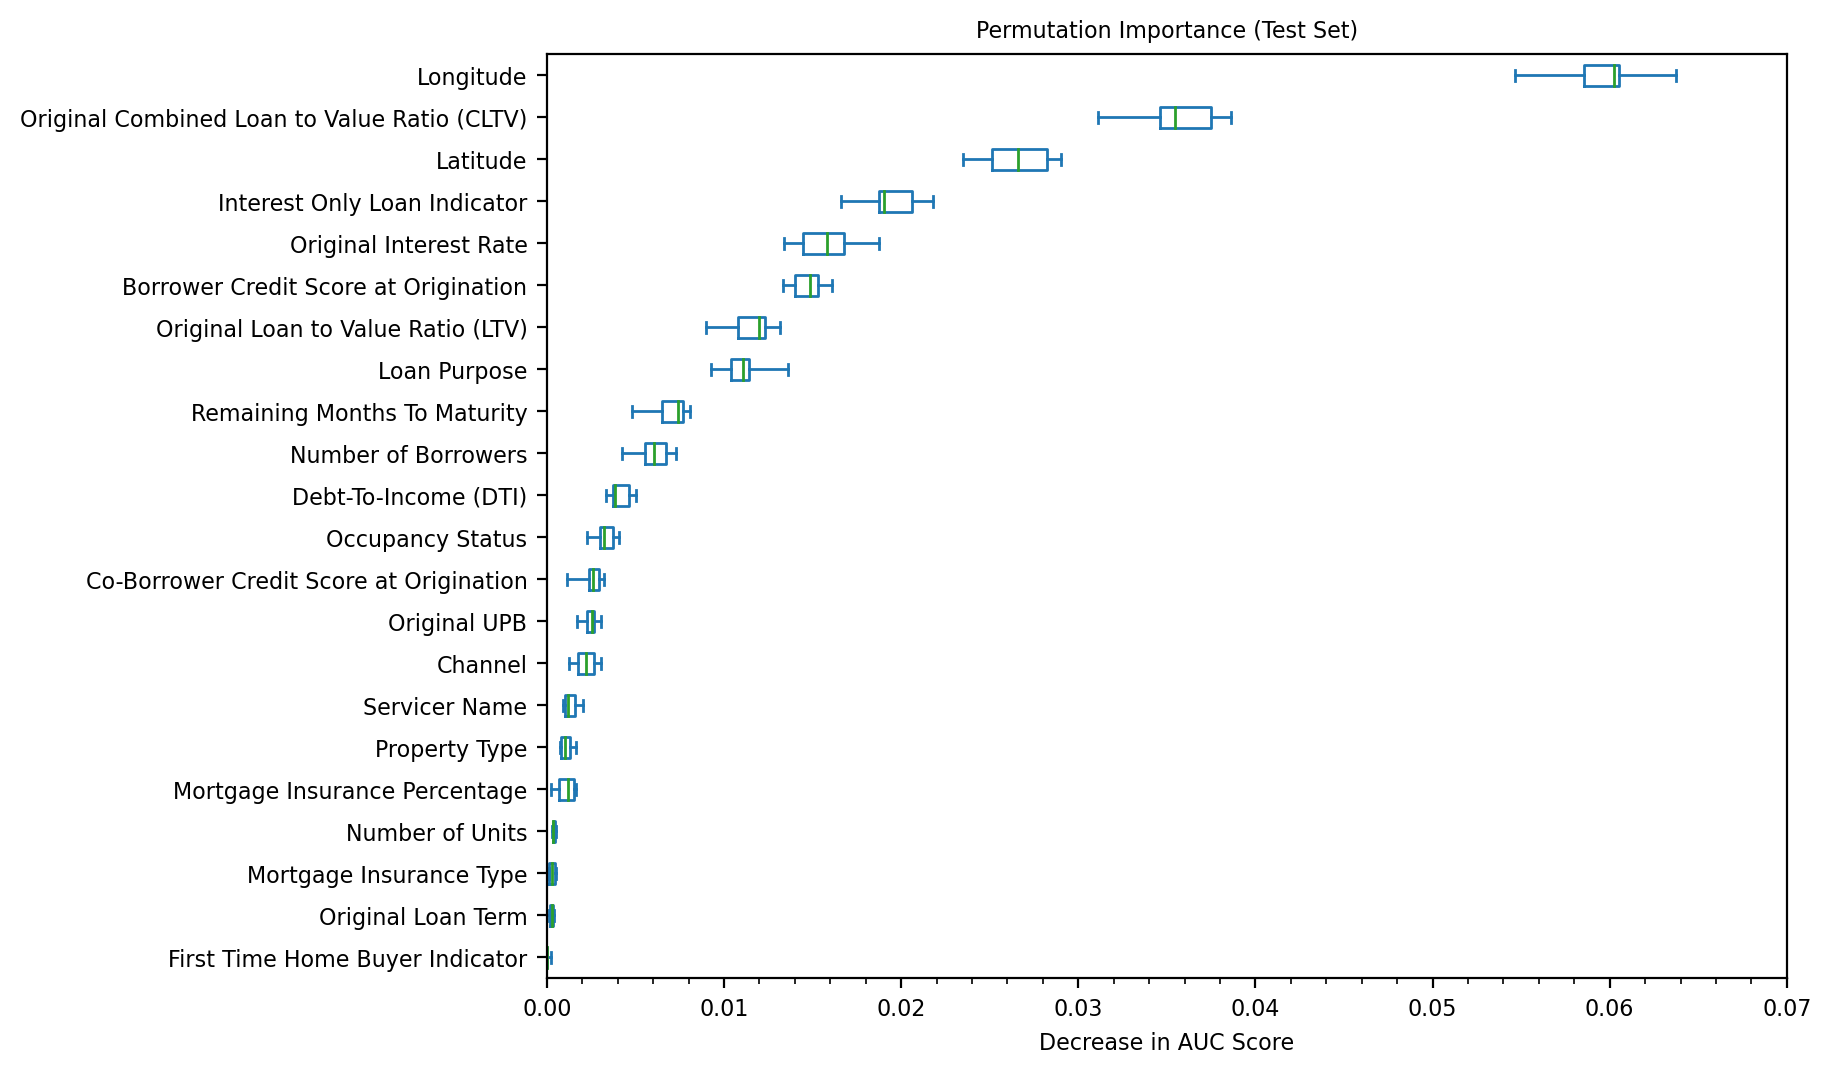

In [1174]:
ax = importances.plot.box(vert=False, whis=10, figsize=(8, 6), fontsize=8)

ax.set_xlim(0, 0.07)
ax.set_xlabel('Decrease in AUC Score', fontsize=8)
ax.set_title('Permutation Importance (Test Set)', fontsize=8)

ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', bottom=False)
ax.xaxis.set_tick_params(which='minor', bottom=True)

The model determined that latitude and longitude were two of the top three most important features! This suggests that the likelihood of default is very geospatially dependent.

the borrower's credit score at the time of loan origination was the most important feature in terms of distinguising between the default and non-default classes, followed by the original unpaid balance, the loan to value ratio, and the borrower's debt to income ratio.

In [ ]:
take loans over several years

In [673]:
# ds = pd.read_csv(
#          '/Users/kyledegrave/DataScience/Website/data/2007Q4.csv', sep='|',
#          header=0, 
#          skiprows=lambda i: i > 0 and random.random() > 0.01
# )

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>